In [1494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [1495]:
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 1.5
plt.rcParams['font.size'] = 7.0
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{lmodern}']
plt.rcParams['axes.linewidth'] = 0.5

# grid
plt.rcParams['grid.linestyle'] = "solid"
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = "e0e0e0"

# axis ticks
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.size'] = 2.0
plt.rcParams['xtick.minor.size'] = 1.0
plt.rcParams['ytick.major.size'] = 2.0
plt.rcParams['ytick.minor.size'] = 1.0

# legend
plt.rcParams['legend.fontsize'] = "small"
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.handleheight'] = 0.5

In [1496]:
data = pd.read_csv("parsed_eval_results.csv", index_col=0)

### Tracker Comparison

### Influence of Detector Threshold

In [1497]:
baseline = data[data.tracker_type.isin(["baseline"]) & data.scale.isin([1.0])]
baseline = baseline.sort_values("det_interval", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.scale.isin([1.0])]
deep_upsampled = deep_upsampled.sort_values("det_interval", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.scale.isin([1.0])]
deep_dense = deep_dense.sort_values("det_interval", axis=0, ascending=True, na_position='last')

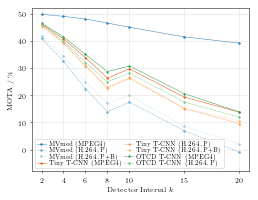

In [1498]:
f, ax = plt.subplots(1, 1, figsize=(3.9,3))  # (3, 2.3) for very small plot

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
ax.plot(baseline[mask]["det_interval"], baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
ax.plot(baseline[mask]["det_interval"], baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
ax.plot(baseline[mask]["det_interval"], baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.plot(deep_dense[mask]["det_interval"], deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))
mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.plot(deep_dense[mask]["det_interval"], deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))
mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
ax.plot(deep_dense[mask]["det_interval"], deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.plot(deep_upsampled[mask]["det_interval"], deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))
mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.plot(deep_upsampled[mask]["det_interval"], deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

leg = ax.legend(["MVmed (MPEG4)", "MVmed (H.264, P)", "MVmed (H.264, P+B)", "Tiny T-CNN (MPEG4)", "Tiny T-CNN (H.264, P)", 
           "Tiny T-CNN (H.264, P+B)", "OTCD T-CNN (MPEG4)", "OTCD T-CNN (H.264, P)"], ncol=2)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Detector Interval $k$")
ax.set_ylim([-8, 52])
ax.set_xticks([2, 4, 6, 8, 10, 15, 20])
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.grid()
plt.savefig("plot_det_interval.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Influence of Input Scale

In [1509]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

#### Plot with offset removed

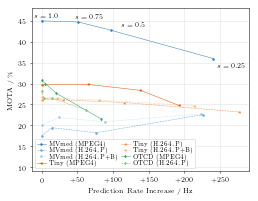

In [1500]:
f, ax = plt.subplots(1, 1, figsize=(3.9,3))

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"] - baseline[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"] - deep_dense[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"] - deep_upsampled[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))

mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"] - deep_upsampled[mask]["predict_fps_mean"].iloc[-1]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

leg = ax.legend(["MVmed (MPEG4)", "MVmed (H.264, P)", "MVmed (H.264, P+B)", "Tiny (MPEG4)", "Tiny (H.264, P)", 
           "Tiny (H.264, P+B)", "OTCD (MPEG4)", "OTCD (H.264, P)"], ncol=2)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Prediction Rate Increase / Hz")
ax.set_ylim([9.0, 48])
ax.set_xticks([0, 50, 100, 150, 200, 250])
ax.set_xticklabels(["0","+50","+100","+150","+200","+250"])
ax.grid()
ax.set_axisbelow(True)

# write text for scale values
plt.text(0.01, 0.945, r'$s = 1.0$', transform=ax.transAxes)
plt.text(0.2, 0.94, r'$s = 0.75$', transform=ax.transAxes)
plt.text(0.41, 0.89, r'$s = 0.5$', transform=ax.transAxes)
plt.text(0.85, 0.64, r'$s = 0.25$', transform=ax.transAxes)

plt.savefig("plot_scaling_factor.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

#### Plot with offset

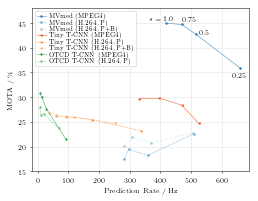

In [1510]:
f, ax = plt.subplots(1, 1, figsize=(3.9,3))

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))

mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

leg = ax.legend(["MVmed (MPEG4)", "MVmed (H.264, P)", "MVmed (H.264, P+B)", "Tiny T-CNN (MPEG4)", "Tiny T-CNN (H.264, P)", 
           "Tiny T-CNN (H.264, P+B)", "OTCD T-CNN (MPEG4)", "OTCD T-CNN (H.264, P)"], ncol=1)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Prediction Rate / Hz")
ax.set_xlim([-20, 690])
ax.set_ylim([15, 48])
ax.grid()
ax.set_axisbelow(True)

# write text for scale values
plt.text(0.54, 0.93, r'$s = 1.0$', transform=ax.transAxes)
plt.text(0.69, 0.92, r'$0.75$', transform=ax.transAxes)
plt.text(0.77, 0.84, r'$0.5$', transform=ax.transAxes)
plt.text(0.92, 0.58, r'$0.25$', transform=ax.transAxes)

plt.savefig("plot_scaling_factor.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Inference Time

In [1507]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

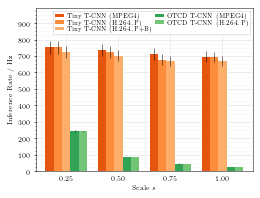

In [1508]:
f, ax = plt.subplots(1, 1, figsize=(3.9,3))

cmap = cm.get_cmap('tab20c')
xs = np.array([0.25, 0.5, 0.75, 1.0])
width = 0.04

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.bar(xs-2*width, deep_dense[mask]["inference_fps_mean"], width=width, yerr=deep_dense[mask]["inference_fps_std"], color=cmap(4))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.bar(xs-width, deep_dense[mask]["inference_fps_mean"], width=width, yerr=deep_dense[mask]["inference_fps_std"], color=cmap(5))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
ax.bar(xs, deep_dense[mask]["inference_fps_mean"], width=width, yerr=deep_dense[mask]["inference_fps_std"], color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.bar(xs+width, deep_upsampled[mask]["inference_fps_mean"], width=width, yerr=deep_upsampled[mask]["inference_fps_std"], color=cmap(8))

mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.bar(xs+2*width, deep_upsampled[mask]["inference_fps_mean"], width=width, yerr=deep_upsampled[mask]["inference_fps_std"], color=cmap(9))

leg = ax.legend(["Tiny T-CNN (MPEG4)", "Tiny T-CNN (H.264, P)", "Tiny T-CNN (H.264, P+B)", "OTCD T-CNN (MPEG4)", "OTCD T-CNN (H.264, P)"], ncol=2)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("Inference Rate / Hz")
ax.set_xlabel("Scale $s$")
ax.set_xticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticks(np.arange(0, 1001, 100))
ax.set_yticks(np.arange(0, 1001, 25), minor=True)
ax.tick_params(axis='x', which='both',length=0)
ax.set_ylim([0, 990])
ax.grid(which='major')
ax.grid(which='minor', linestyle="dotted")
ax.set_axisbelow(True)

plt.savefig("plot_inference_times.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Influence of Vector Type (P vs. P+B)

### Influence of Codec (MPEG4 vs. H.264)

### Influence of Camera Motion on MOT17 (Static vs. Dynamic)